In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# Problem:

Given customer data, explore:

1. customer behavior/preferences
1. analyze marketing campaigns - customer demographics/referral sources
1. evaluate effectiveness of referral strategies
1. determine which demographic groups are more likely to subscribe to certain subscriptions
1. identify trends in subscription types
1. user characteristics/behavior determine churn

-- Subscription-based, SaaS business questions are limited by given dataset.

# Data Dictionary:

* cust_id: A unique identifier for each customer.
* transaction_type: The type of transaction.
* transaction_date: The date when the transaction was made.
* subscription_type: The type of subscription, which can be BASIC, MAX, or PRO.
* subscription_price: The price of the subscription.
* customer_gender: The gender of the customer, which can be Male or Female.
* age_group: The age group of the customer.
* customer_country: The country where the customer is located.
* referral_type: The type of referral, which can be Google Ads, Facebook, Display, or others.

# Data

In [2]:
df = pd.read_csv('/kaggle/input/performance-of-a-subscription-business/Customer_Subscription_And_Transaction_Details.csv')
df.head()

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18106 entries, 0 to 18105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             18106 non-null  int64 
 1   transaction_type    18106 non-null  object
 2   transaction_date    18106 non-null  object
 3   subscription_type   18106 non-null  object
 4   subscription_price  18106 non-null  int64 
 5   customer_gender     18106 non-null  object
 6   age_group           18106 non-null  object
 7   customer_country    18106 non-null  object
 8   referral_type       18106 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

cust_id               0
transaction_type      0
transaction_date      0
subscription_type     0
subscription_price    0
customer_gender       0
age_group             0
customer_country      0
referral_type         0
dtype: int64

This is a clean dataset with multiple lines per customer because there are multiple transactions per customer recorded.

In [5]:
# Span of data: 2 full years
df.transaction_date.min(), df.transaction_date.max()

('2020-01-01', '2022-12-01')

In [6]:
# Let's take a look at some initial customer demographic data by filtering to first initial tx/customer id
cust_init = df.loc[df['transaction_type'] == 'initial']
cust_init

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display
5,5,initial,2022-08-01,BASIC,53,Male,35-44,Sweden,Google Ads
...,...,...,...,...,...,...,...,...,...
18095,10362,initial,2021-01-01,PRO,75,Female,25-34,Denmark,facebook
18097,10363,initial,2020-10-01,PRO,65,Female,18-24,Finland,Google Ads
18100,10364,initial,2021-04-01,PRO,75,Female,45-54,Norway,facebook
18102,10365,initial,2021-05-01,PRO,75,Male,55-65,Norway,Google Ads


In [7]:
#checking to see how many unique customers there are matches table output
df['cust_id'].nunique()

10366

<Axes: xlabel='transaction_date'>

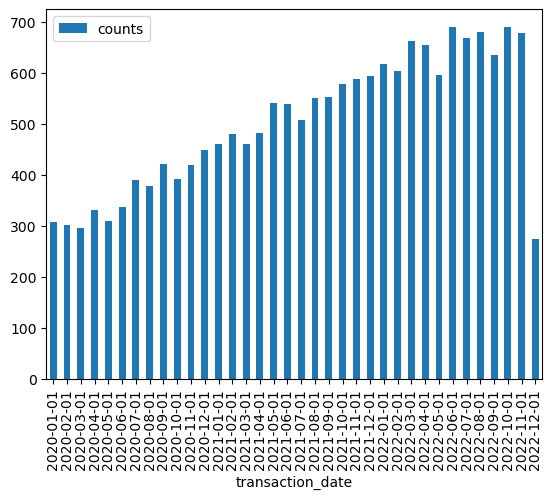

In [8]:
#When did they become subscribers?
tx_date_ct = df.groupby(['transaction_date']).size().reset_index(name='counts')
tx_date_ct.plot.bar(x = 'transaction_date', y='counts')

/tmp/ipykernel_20/2349593669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_init['tx_initial_month'] = pd.DatetimeIndex(cust_init['transaction_date']).month


<Axes: xlabel='tx_initial_month'>

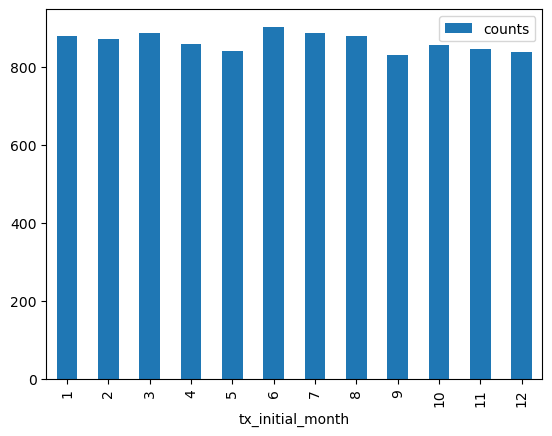

In [9]:
#Let's see if there is any month that overpowerd any other regarding intiial sub's
cust_init['tx_initial_month'] = pd.DatetimeIndex(cust_init['transaction_date']).month
tx_date_ct_month = cust_init.groupby(['tx_initial_month']).size().reset_index(name='counts')
tx_date_ct_month.plot.bar(x = 'tx_initial_month', y='counts')

([<matplotlib.patches.Wedge at 0x7c02d1a3e530>,
 [Text(1.097730331779345, 0.07062661461240598, 'Bing'),
  Text(1.0706447612097414, 0.2524278021417924, 'Display'),
  Text(0.235849986488385, 1.0744183467688129, 'Google Ads'),
  Text(-1.0180128169093534, 0.4167132162630355, 'Organic Search'),
  Text(-1.0474525815729823, -0.33592125469534534, 'Paid Search'),
  Text(-0.8059250610643516, -0.7486553251987335, 'TV'),
  Text(-0.5106732302399932, -0.9742755523548002, 'Unknown'),
  Text(0.6700121538574971, -0.8724011197168638, 'facebook')],
 [Text(0.5987619991523699, 0.03852360797040325, '2%'),
  Text(0.5839880515689498, 0.1376878920773413, '3%'),
  Text(0.12864544717548274, 0.5860463709648069, '32%'),
  Text(-0.5552797183141928, 0.2272981179616557, '12%'),
  Text(-0.5713377717670811, -0.18322977528837017, '10%'),
  Text(-0.4395954878532826, -0.4083574501084, '4%'),
  Text(-0.2785490346763599, -0.5314230285571637, '7%'),
  Text(0.36546117483136203, -0.4758551562091984, '29%')])

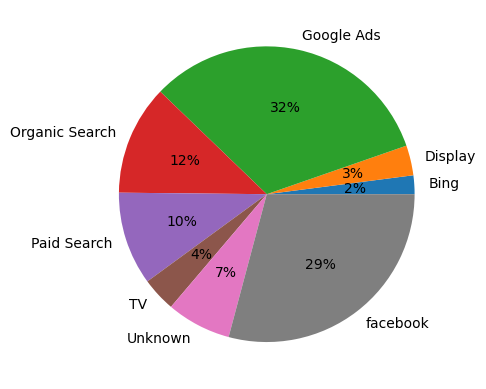

In [10]:
#What was most popular channel that caused subscriptions?
init_refs = cust_init.groupby(['referral_type']).size().reset_index(name='counts')
plt.pie(x=init_refs["counts"], labels=init_refs.referral_type, autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x7c02d1cbaaa0>,
 [Text(0.953479634737143, 0.728612782032764, 'Denmark'),
  Text(-0.3919920208384007, 1.1341702939149072, 'Finland'),
  Text(-1.1999858919386257, 0.005818861423063767, 'Norway'),
  Text(0.37165041626116774, -1.1409977949553192, 'Sweden')],
 [Text(0.8740229985090479, 0.6678950501967005, '21%'),
  Text(-0.35932601910186734, 1.0396561027553317, '19%'),
  Text(-1.099987067610407, 0.00533395630447512, '20%'),
  Text(0.34067954823940383, -1.0459146453757093, '40%')])

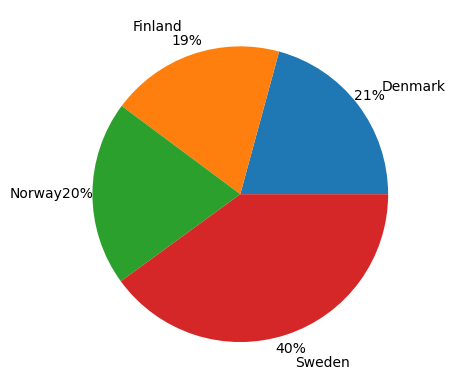

In [11]:
# Country that initial sign-up's came from
init_loc = cust_init.groupby(['customer_country']).size().reset_index(name='counts')
plt.pie(x=init_loc["counts"], labels=init_loc.customer_country, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

([<matplotlib.patches.Wedge at 0x7c02d1ce2c20>,
 [Text(0.8626798763257643, 0.8341363383659556, '18-24'),
  Text(-0.6854255189381459, 0.9849831765001742, '25-34'),
  Text(-1.163491484377517, -0.29374745238214744, '35-44'),
  Text(-0.19766458324014477, -1.1836083442306833, '45-54'),
  Text(1.0080718163386975, -0.6509924831390906, '55-65')],
 [Text(0.7907898866319507, 0.7646249768354593, '24%'),
  Text(-0.6283067256933005, 0.9029012451251598, '20%'),
  Text(-1.0665338606793906, -0.26926849801696856, '18%'),
  Text(-0.1811925346367994, -1.0849743155447933, '19%'),
  Text(0.9240658316438062, -0.5967431095441665, '18%')])

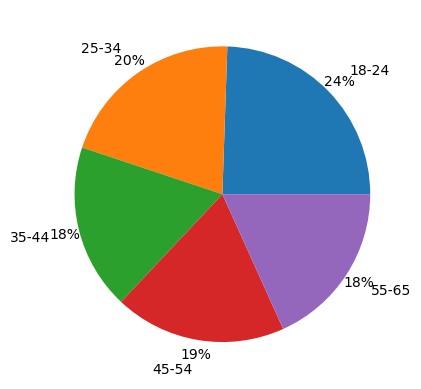

In [12]:
# Age Group that initial sign-up's came from
init_age = cust_init.groupby(['age_group']).size().reset_index(name='counts')
plt.pie(x=init_age["counts"], labels=init_age.age_group, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

([<matplotlib.patches.Wedge at 0x7c02d19915d0>,
 [Text(-0.07777310352641027, 1.197477074673194, 'Female'),
  Text(-0.20984999484393463, -1.1815087725717488, 'Male'),
  Text(1.165424159448859, -0.28598344108168233, 'Other')],
 [Text(-0.0712920115658761, 1.0976873184504279, '52%'),
  Text(-0.19236249527360677, -1.08304970819077, '40%'),
  Text(1.0683054794947877, -0.26215148765820884, '8%')])

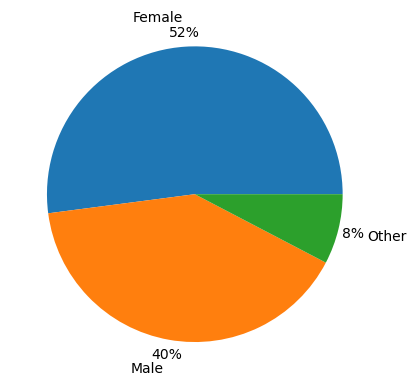

In [13]:
# Gender that initial sign-up's came from
init_gender = cust_init.groupby(['customer_gender']).size().reset_index(name='counts')
plt.pie(x=init_gender["counts"], labels=init_gender.customer_gender, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

([<matplotlib.patches.Wedge at 0x7c02d1e21ba0>,
 [Text(0.3445767498865587, 1.1494637286307106, 'BASIC'),
  Text(-1.198841501909965, -0.05271672693044681, 'MAX'),
  Text(0.3947407282132788, -1.1332165536602659, 'PRO')],
 [Text(0.3158620207293455, 1.0536750845781515, '41%'),
  Text(-1.098938043417468, -0.04832366635290958, '20%'),
  Text(0.36184566752883895, -1.0387818408552438, '39%')])

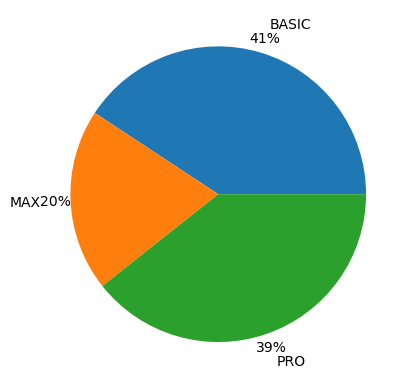

In [14]:
# Subscription type during initial sign-up
init_sub = cust_init.groupby(['subscription_type']).size().reset_index(name='counts')
plt.pie(x=init_sub["counts"], labels=init_sub.subscription_type, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

([<matplotlib.patches.Wedge at 0x7c02d0f03880>,
 [Text(0.3445767498865587, 1.1494637286307106, 'BASIC'),
  Text(-1.198841501909965, -0.05271672693044681, 'MAX'),
  Text(0.3947407282132788, -1.1332165536602659, 'PRO')],
 [Text(0.3158620207293455, 1.0536750845781515, '41%'),
  Text(-1.098938043417468, -0.04832366635290958, '20%'),
  Text(0.36184566752883895, -1.0387818408552438, '39%')])

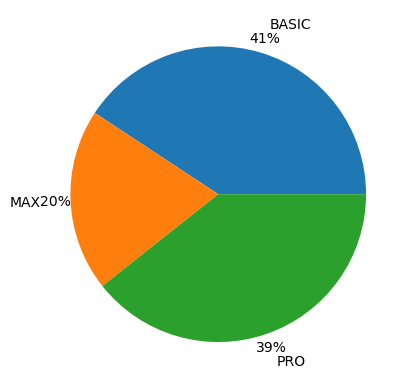

In [15]:
# Subscription type during initial sign-up
init_sub = cust_init.groupby(['subscription_type']).size().reset_index(name='counts')
plt.pie(x=init_sub["counts"], labels=init_sub.subscription_type, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

([<matplotlib.patches.Wedge at 0x7c02d196ee60>,
 [Text(1.0887532632018904, 0.5045952158584491, '33'),
  Text(0.32536981162916184, 1.1550473954260074, '43'),
  Text(-0.6485463957531451, 1.0096472515466008, '53'),
  Text(-1.1847269230224042, 0.19084579603927895, '65'),
  Text(-0.9418791429417233, -0.7435480348244926, '75'),
  Text(-0.10750505974899983, -1.1951747412526605, '85'),
  Text(0.5960061681198655, -1.041526114681276, '99'),
  Text(0.9602828391285294, -0.7196227267639974, '109'),
  Text(1.1714655019640343, -0.2601318467780391, '119')],
 [Text(0.998023824601733, 0.46254561453691173, '14%'),
  Text(0.2982556606600651, 1.0587934458071735, '14%'),
  Text(-0.5945008627737164, 0.9255099805843842, '13%'),
  Text(-1.085999679437204, 0.1749419797026724, '13%'),
  Text(-0.8633892143632464, -0.6815856985891182, '13%'),
  Text(-0.09854630476991652, -1.0955768461482722, '13%'),
  Text(0.5463389874432101, -0.9547322717911698, '6%'),
  Text(0.8802592692011522, -0.659654166200331, '7%'),
  Text(

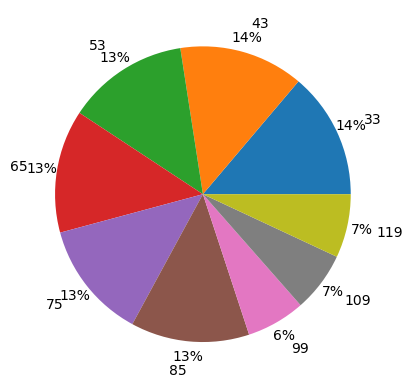

In [16]:
# Subscription price during initial sign-up
init_price = cust_init.groupby(['subscription_price']).size().reset_index(name='counts')
plt.pie(x=init_price["counts"], labels=init_price.subscription_price, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

In [17]:
grouped = cust_init.groupby(['subscription_type', 'subscription_price']).size().reset_index(name='counts')
grouped.sort_values('counts', ascending=False)

,subscription_type,subscription_price,counts
0,BASIC,33,1432
1,BASIC,43,1413
6,PRO,65,1395
2,BASIC,53,1377
8,PRO,85,1345
7,PRO,75,1337
5,MAX,119,721
4,MAX,109,680
3,MAX,99,666


### Observations from Initial Sign-up's:
1. There was growth from beginning of 2020 to end of 2022. Growth is not continual increase though. Some dips in between, but not seasonal.
1. Not much difference month-to-month regardless of subscription year. Though June had the highest number of subscribers.
1. Most customers are coming from paid ads placed on Google and Facebook platforms.
1. Majority are coming from Sweden.
1. Biggest age demographic is 18-24 but all other age groups are not that far behind. So this subscription has a great spread across age groups.
1. Most customers are female but not highly dominant.
1. Basic and Pro subscriptions (lowest and middle tier) were most popular sub types.
1. Price range for sub's were mostly between 33 and 85, which is a huge range and does not map to 3 different sub tiers. There are 3 different prices per subscription type. And the most dominant initial subscription were from the lowest tiers from Basic Subscription Type with lowest Pro tier following in 3rd place.

In [18]:
# Now let's look at different populations compared against each other - those who upgrade (initial > upgrade) VERSUS those who downgrade (inital>reduction / initial/churn / reduction>churn / upgrade/reduction / upgrade>churn)
counts = df['cust_id'].value_counts()
df[df['cust_id'].isin(counts.index[counts > 1])].head(20)

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
8,8,initial,2021-01-01,BASIC,43,Other,45-54,Sweden,facebook
9,8,CHURN,2021-04-01,BASIC,43,Other,45-54,Sweden,facebook
10,9,initial,2020-08-01,BASIC,33,Female,25-34,Sweden,facebook
11,9,CHURN,2021-03-01,BASIC,43,Female,25-34,Sweden,facebook
13,11,initial,2020-05-01,BASIC,33,Female,45-54,Norway,Organic Search
14,11,UPGRADE,2022-01-01,MAX,119,Female,45-54,Norway,Organic Search
15,12,initial,2020-09-01,BASIC,33,Male,25-34,Finland,facebook
16,12,UPGRADE,2022-09-01,PRO,85,Male,25-34,Finland,facebook


In [19]:
df.transaction_type.value_counts()

initial      10366
UPGRADE       3006
REDUCTION     2539
CHURN         2195
Name: transaction_type, dtype: int64